In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
train_df = pd.read_csv(r'C:\Users\croatia\Desktop\python\Datasets\spaceship titanic\train.csv')
test_df = pd.read_csv(r'C:\Users\croatia\Desktop\python\Datasets\spaceship titanic\test.csv')

CHECKING OUT THE DATASET

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## EDA

WE CAN MAKE INTERESTING CONCLUSIONS ABOUT FACTORS WHICH CAN CONTRIBUTE TO A BIGGER CHANCE OF BEING TRANSPORTED SUCH AS:

- BEING FROM PLANET EUROPA OR MARS
- BEING IN CRYOSLEEP
- TRAVELING TO TRAPPIST OR CANCRI
- BEING OF YOUNGER AGE
- BEING RICHER/SPENDING MORE

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

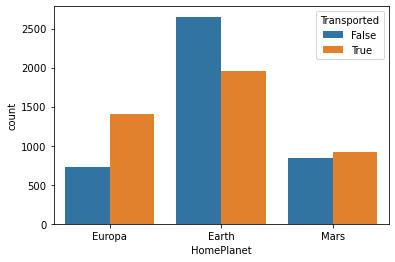

In [7]:
sns.countplot(train_df['HomePlanet'],hue=train_df['Transported'])

EXPLORING THE CABIN FEATURE MORE BY SEPERATING THE DECK AND THE SIDE

In [9]:
train_df['Cabin'].value_counts().head(20)

G/734/S     8
G/109/P     7
G/1476/S    7
B/201/P     7
E/13/S      7
D/176/S     7
B/82/S      7
G/981/S     7
C/137/S     7
B/11/S      7
G/1368/P    7
C/21/P      7
F/1411/P    7
F/1194/P    7
A/67/P      6
G/765/S     6
F/856/P     6
B/19/S      6
G/150/S     6
C/255/S     6
Name: Cabin, dtype: int64

In [10]:
train_df['CabinDeck'] = train_df[train_df['Cabin'].notnull()]['Cabin'].apply(lambda x:x.split('/')[0])

In [11]:
test_df['CabinDeck'] = test_df[test_df['Cabin'].notnull()]['Cabin'].apply(lambda x:x.split('/')[0])

In [12]:
train_df['CabinSide'] = train_df[train_df['Cabin'].notnull()]['Cabin'].apply(lambda x:x.split('/')[2])

In [13]:
test_df['CabinSide'] = test_df[test_df['Cabin'].notnull()]['Cabin'].apply(lambda x:x.split('/')[2])

<AxesSubplot:xlabel='CabinDeck', ylabel='count'>

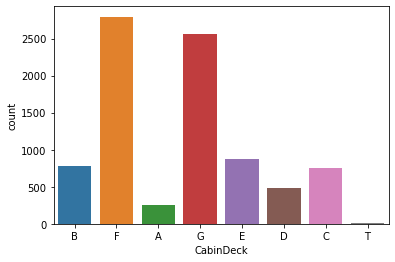

In [14]:
sns.countplot(train_df['CabinDeck'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

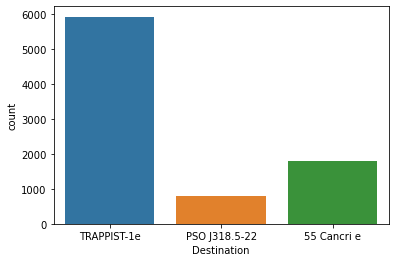

In [16]:
sns.countplot(train_df['Destination'])

<AxesSubplot:xlabel='VIP', ylabel='count'>

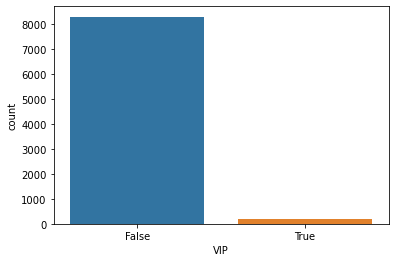

In [18]:
sns.countplot(train_df['VIP'])

<AxesSubplot:xlabel='Transported', ylabel='count'>

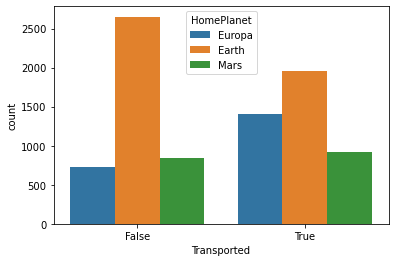

In [19]:
sns.countplot(train_df['Transported'],hue=train_df['HomePlanet'])

<AxesSubplot:xlabel='Transported', ylabel='count'>

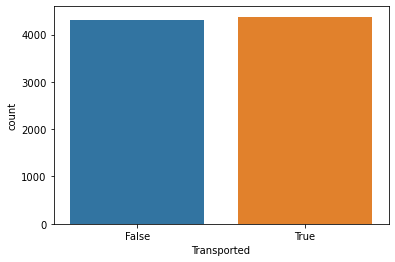

In [20]:
sns.countplot(train_df['Transported'])

<AxesSubplot:xlabel='Transported', ylabel='count'>

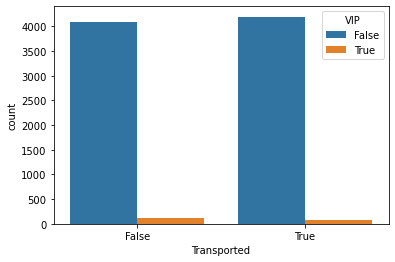

In [21]:
sns.countplot(train_df['Transported'],hue=train_df['VIP'])

<AxesSubplot:xlabel='Transported', ylabel='count'>

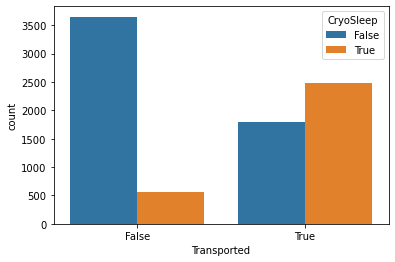

In [22]:
sns.countplot(train_df['Transported'],hue=train_df['CryoSleep'])

<AxesSubplot:xlabel='Transported', ylabel='count'>

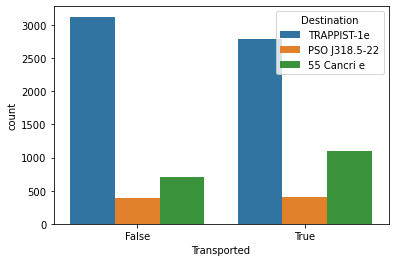

In [23]:
sns.countplot(train_df['Transported'],hue=train_df['Destination'])

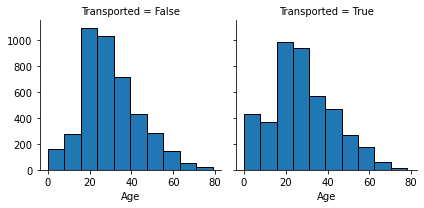

In [24]:
g = sns.FacetGrid(train_df,col='Transported')
g = g.map(plt.hist,'Age',edgecolor='black')

CHECKING FOR OUTLIERS

<AxesSubplot:xlabel='RoomService'>

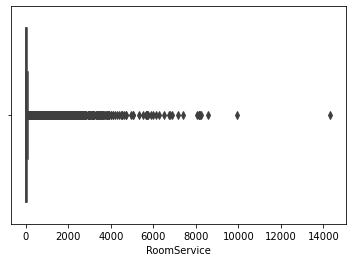

In [26]:
sns.boxplot(train_df['RoomService'])

<AxesSubplot:xlabel='FoodCourt'>

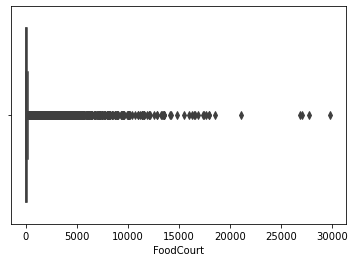

In [27]:
sns.boxplot(train_df['FoodCourt'])


<AxesSubplot:xlabel='ShoppingMall'>

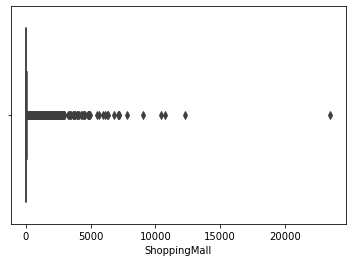

In [28]:
sns.boxplot(train_df['ShoppingMall'])


<AxesSubplot:xlabel='Spa'>

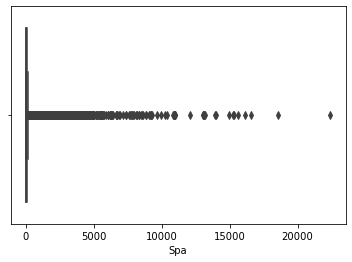

In [29]:
sns.boxplot(train_df['Spa'])


<AxesSubplot:xlabel='VRDeck'>

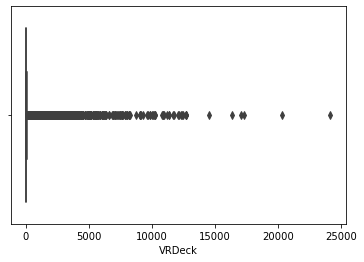

In [30]:
sns.boxplot(train_df['VRDeck'])

<AxesSubplot:>

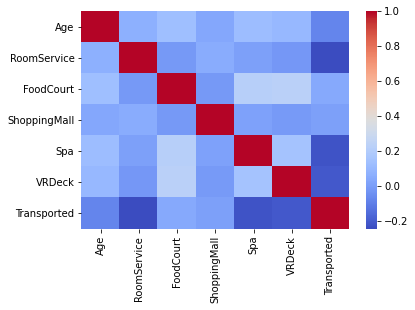

In [33]:
sns.heatmap(train_df.corr(),cmap='coolwarm')

<AxesSubplot:xlabel='Spa', ylabel='Age'>

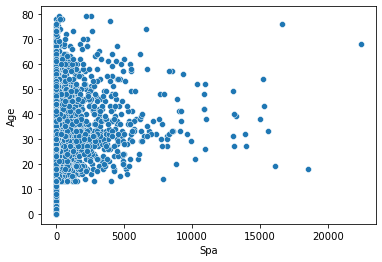

In [34]:
sns.scatterplot(data=train_df,x='Spa',y='Age')

In [35]:
train_df['TotalSpending'] = train_df['RoomService']+train_df['FoodCourt']+train_df['ShoppingMall']+train_df['Spa']+train_df['VRDeck']

<AxesSubplot:xlabel='TotalSpending', ylabel='Age'>

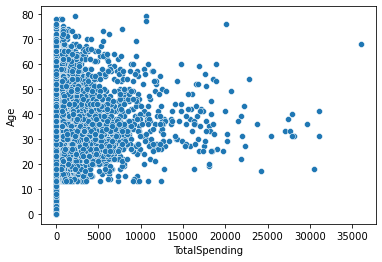

In [36]:
sns.scatterplot(data=train_df,x='TotalSpending',y='Age')

CHECKING TOTAL SPENDINGS BY FEATURES

<AxesSubplot:xlabel='HomePlanet', ylabel='TotalSpending'>

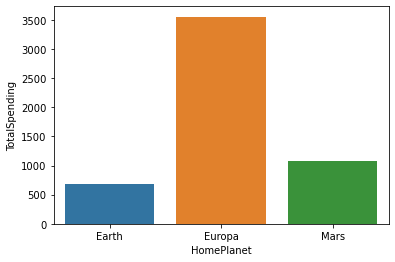

In [38]:
spending_planet = train_df.groupby('HomePlanet').agg({'TotalSpending':'mean'}).reset_index()
sns.barplot(spending_planet['HomePlanet'],spending_planet['TotalSpending'])

<AxesSubplot:xlabel='Destination', ylabel='TotalSpending'>

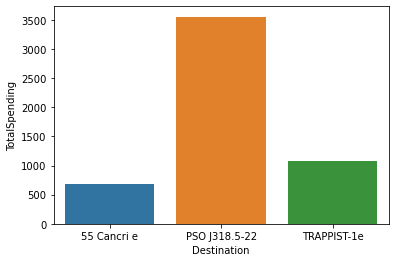

In [39]:
spending_dest = train_df.groupby('Destination').agg({'TotalSpending':'mean'}).reset_index()
sns.barplot(spending_dest['Destination'],spending_planet['TotalSpending'])

<AxesSubplot:xlabel='VIP', ylabel='TotalSpending'>

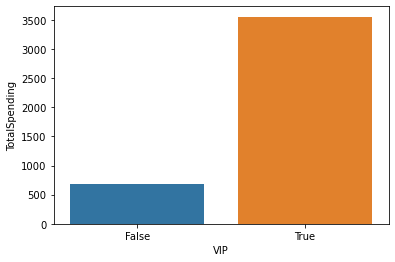

In [40]:
spending_vip = train_df.groupby('VIP').agg({'TotalSpending':'mean'}).reset_index()
sns.barplot(spending_vip['VIP'],spending_planet['TotalSpending'])

<AxesSubplot:xlabel='Transported', ylabel='TotalSpending'>

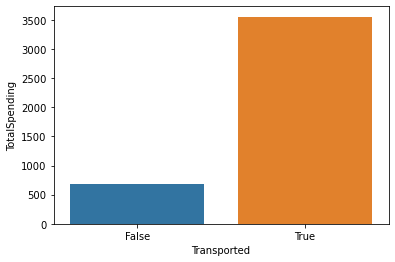

In [41]:
spending_trans = train_df.groupby('Transported').agg({'TotalSpending':'mean'}).reset_index()
sns.barplot(spending_trans['Transported'],spending_planet['TotalSpending'])

<AxesSubplot:xlabel='CabinDeck', ylabel='TotalSpending'>

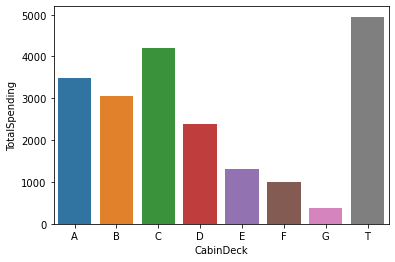

In [42]:
spending_deck = train_df.groupby('CabinDeck').agg({'TotalSpending':'mean'}).reset_index()
sns.barplot(spending_deck['CabinDeck'],spending_deck['TotalSpending'])

In [43]:
train_df.isnull().sum()/train_df.shape[0]*100

PassengerId       0.000000
HomePlanet        2.312205
CryoSleep         2.496261
Cabin             2.289198
Destination       2.093639
Age               2.059128
VIP               2.335212
RoomService       2.082135
FoodCourt         2.105142
ShoppingMall      2.392730
Spa               2.105142
VRDeck            2.162660
Name              2.300702
Transported       0.000000
CabinDeck         2.289198
CabinSide         2.289198
TotalSpending    10.445186
dtype: float64

In [44]:
train_df.isnull().sum()

PassengerId        0
HomePlanet       201
CryoSleep        217
Cabin            199
Destination      182
Age              179
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
CabinDeck        199
CabinSide        199
TotalSpending    908
dtype: int64

<AxesSubplot:>

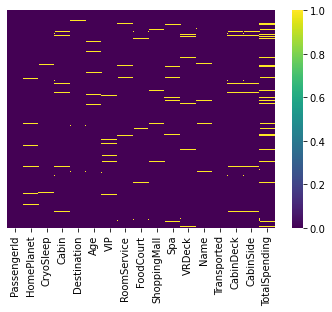

In [45]:
sns.heatmap(train_df.isnull(),cmap='viridis',yticklabels=False)

In [46]:
train_df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

## DATA CLEANING

In [47]:
train_df['HomePlanet'] = train_df['HomePlanet'].fillna('Other')
test_df['HomePlanet'] = test_df['HomePlanet'].fillna('Other')

In [48]:
train_df['CryoSleep'].isnull().sum()

217

In [49]:
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(False)
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(False)

In [50]:
train_df['Destination'].isnull().sum()

182

In [51]:
train_df['Destination'] = train_df['Destination'].fillna('TRAPPIST-1e')
test_df['Destination'] = test_df['Destination'].fillna('TRAPPIST-1e')

In [52]:
train_df.groupby('HomePlanet').agg({'Age':'mean'})

,Age
HomePlanet,
Earth,26.068232
Europa,34.419664
Mars,29.297203
Other,28.793970


In [53]:
def impute_age(col):
    #Age=col[0]
    #Planet=col[1]
    if pd.isnull(col[0]):
        if col[1]=='Earth':
            return 26.0
        elif col[1]=='Europa':
            return 34.0
        elif col[1]=='Mars':
            return 29.0
        else:
            return 28.0
    else:
        return col[0]

In [54]:
train_df['Age'] = train_df[['Age','HomePlanet']].apply(impute_age,axis=1)

In [55]:
test_df['Age'] = test_df[['Age','HomePlanet']].apply(impute_age,axis=1)

In [57]:
train_df['VIP'] = train_df['VIP'].fillna(False)
test_df['VIP'] = test_df['VIP'].fillna(False)

In [60]:
# ROOM SERVICE

def impute_room_service(col):
    if pd.isnull(col[1]):
        if col[0] == 'Earth':
            return 150.0
        elif col[0] == 'Europa':
            return 160.0
        elif col[0] == 'Mars':
            return 550.0
        else:
            return 200
    else:
        return col[1]

train_df['RoomService'] = train_df[['HomePlanet','RoomService']].apply(impute_room_service,axis=1)
test_df['RoomService'] = test_df[['HomePlanet','RoomService']].apply(impute_room_service,axis=1)

In [61]:
train_df.drop(train_df[train_df['RoomService']>9000].index,inplace=True)
test_df.drop(test_df[test_df['RoomService']>9000].index,inplace=True)

In [62]:
# FOOD COURT

def impute_food_court(col):
    if pd.isnull(col[1]):
        if col[0] == 'Earth':
            return 150.0
        elif col[0] == 'Europa':
            return 1500.0
        elif col[0] == 'Mars':
            return 100.0
        else:
            return 350.0
    else:
        return col[1]
    
train_df['FoodCourt'] = train_df[['HomePlanet','FoodCourt']].apply(impute_food_court,axis=1)
test_df['FoodCourt'] = test_df[['HomePlanet','FoodCourt']].apply(impute_food_court,axis=1)

In [63]:
train_df.drop(train_df[train_df['FoodCourt']>20000].index,inplace=True)
test_df.drop(test_df[test_df['FoodCourt']>20000].index,inplace=True)

In [64]:
# SHOOPINGMALL

def impute_shop(col):
    if pd.isnull(col[1]):
        if col[0] == 'Earth':
            return 140.0
        elif col[0] == 'Europa':
            return 150.0
        elif col[0] == 'Mars':
            return 300.0
        else:
            return 150.0
    else:
        return col[1]
    
train_df['ShoppingMall'] = train_df[['HomePlanet','ShoppingMall']].apply(impute_shop,axis=1)
test_df['ShoppingMall'] = test_df[['HomePlanet','ShoppingMall']].apply(impute_shop,axis=1)

In [65]:
train_df.drop(train_df[train_df['ShoppingMall']>10000].index,inplace=True)

In [66]:
# SPA

def impute_spa(col):
    if pd.isnull(col[1]):
        if col[0] == 'Earth':
            return 150.0
        elif col[0] == 'Europa':
            return 800.0
        elif col[0] == 'Mars':
            return 150.0
        else:
            return 250.0
    else:
        return col[1]
    
train_df['Spa'] = train_df[['HomePlanet','Spa']].apply(impute_spa,axis=1)
test_df['Spa'] = test_df[['HomePlanet','Spa']].apply(impute_spa,axis=1)

In [67]:
train_df.drop(train_df[train_df['Spa']>16000].index,inplace=True)
test_df.drop(test_df[test_df['Spa']>16000].index,inplace=True)

In [68]:
# VR Deck

def impute_vr(col):
    if pd.isnull(col[1]):
        if col[0] == 'Earth':
            return 100.0
        elif col[0] == 'Europa':
            return 900.0
        elif col[0] == 'Mars':
            return 50.0
        else:
            return 300.0
    else:
        return col[1]
    
train_df['VRDeck'] = train_df[['HomePlanet','VRDeck']].apply(impute_vr,axis=1)
test_df['VRDeck'] = test_df[['HomePlanet','VRDeck']].apply(impute_vr,axis=1)

In [69]:
train_df.drop(train_df[train_df['VRDeck']>15000].index,inplace=True)
train_df.drop(test_df[test_df['VRDeck']>15000].index,inplace=True)

In [70]:
# Cabin Deck

train_df['CabinDeck'].fillna(method='backfill',inplace=True)
test_df['CabinDeck'].fillna(method='backfill',inplace=True)

In [71]:
# Cabin Side

train_df['CabinSide'].fillna(method='backfill',inplace=True)
test_df['CabinSide'].fillna(method='backfill',inplace=True)

## FEATURE ENGINEERING

In [72]:
train_copy_df = train_df.copy()
train_df = train_df.drop(['PassengerId','Cabin','Name','TotalSpending'],axis=1)

In [73]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [74]:
test_df = test_df.drop(['PassengerId','Cabin','Name'],axis=1)

In [75]:
planet_train = pd.get_dummies(train_df['HomePlanet'],drop_first=True)
planet_test = pd.get_dummies(test_df['HomePlanet'],drop_first=True)

destination_train = pd.get_dummies(train_df['Destination'],drop_first=True)
destination_test = pd.get_dummies(test_df['Destination'],drop_first=True)

cabin_d_train = pd.get_dummies(train_df['CabinDeck'],drop_first=True)
cabin_d_test = pd.get_dummies(test_df['CabinDeck'],drop_first=True)

cabin_s_train = pd.get_dummies(train_df['CabinSide'],drop_first=True)
cabin_s_test = pd.get_dummies(test_df['CabinSide'],drop_first=True)

In [76]:
train_df = pd.concat([train_df,planet_train,destination_train,cabin_d_train,cabin_s_train],axis=1)
test_df = pd.concat([test_df,planet_test,destination_test,cabin_d_test,cabin_s_test],axis=1)

In [77]:
train_final = train_df.drop(['HomePlanet','Destination','CabinDeck','CabinSide'],axis=1)
test_final = test_df.drop(['HomePlanet','Destination','CabinDeck','CabinSide'],axis=1)

In [78]:
# TRAIN TEST SPLIT

train_final.columns

X = train_final.drop('Transported',axis=1)
y = train_final['Transported']

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MODEL BUILDING

In [82]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

In [83]:
LR = LogisticRegression(C=0.39)
LR.fit(X_train,y_train)

LogisticRegression(C=0.39)

In [84]:
predictions_LR = LR.predict(X_test)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [86]:
print('The Accuracy Score for the model is: ',accuracy_score(y_test,predictions_LR))
print('')
print(confusion_matrix(y_test,predictions_LR))
print('')
print(classification_report(y_test,predictions_LR))

The Accuracy Score for the model is:  0.7779700115340253

[[661 206]
 [179 688]]

              precision    recall  f1-score   support

       False       0.79      0.76      0.77       867
        True       0.77      0.79      0.78       867

    accuracy                           0.78      1734
   macro avg       0.78      0.78      0.78      1734
weighted avg       0.78      0.78      0.78      1734



In [87]:
# USING LOG REG PIPLINE

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [88]:
#std_slc = StandardScaler()
#pca = decomposition.PCA()
#logistic_Reg = LogisticRegression()

#pipe = Pipeline(steps=[('std_slc', std_slc),
                       #('pca', pca),
                       #('logistic_Reg', logistic_Reg)])

#n_components = list(range(1,X.shape[1]+1,1))

#C = np.logspace(-4, 4, 50)
#penalty = ['l1', 'l2']
    
#parameters = dict(pca__n_components=n_components,
                      #logistic_Reg__C=C,
                      #logistic_Reg__penalty=penalty)

In [89]:
#clf_GS = GridSearchCV(pipe, parameters)
#clf_GS.fit(X, y)

In [90]:
#print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
#print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
#print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
#print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

In [91]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
predictions_rfc = rfc.predict(X_test)

In [93]:
print('The Accuracy Score for the model is: ',accuracy_score(y_test,predictions_rfc))
print('')
print(classification_report(y_test,predictions_rfc))
print('')
print(confusion_matrix(y_test,predictions_rfc))

The Accuracy Score for the model is:  0.8033448673587081

              precision    recall  f1-score   support

       False       0.78      0.84      0.81       867
        True       0.83      0.77      0.80       867

    accuracy                           0.80      1734
   macro avg       0.80      0.80      0.80      1734
weighted avg       0.80      0.80      0.80      1734


[[727 140]
 [201 666]]


In [94]:
# SVM

from sklearn.svm import SVC

In [95]:
model = SVC(C=1,gamma=0.0001)
model.fit(X_train,y_train)
predictions_svm = model.predict(X_test)

In [96]:
print('The Accuracy Score for the model is: ',accuracy_score(y_test,predictions_svm))
print('')
print(classification_report(y_test,predictions_svm))
print('')
print(confusion_matrix(y_test,predictions_svm))

The Accuracy Score for the model is:  0.7612456747404844

              precision    recall  f1-score   support

       False       0.77      0.75      0.76       867
        True       0.76      0.77      0.76       867

    accuracy                           0.76      1734
   macro avg       0.76      0.76      0.76      1734
weighted avg       0.76      0.76      0.76      1734


[[652 215]
 [199 668]]


In [97]:
#param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [98]:
#grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [99]:
#grid.fit(X_train,y_train)

In [100]:
#grid.best_estimator_

In [101]:
#grid_predictions = grid.predict(X_test)

In [102]:
#print('The Accuracy Score for the model is: ',accuracy_score(y_test,grid_predictions))
#print('')
#print(classification_report(y_test,grid_predictions))
#print('')
#print(confusion_matrix(y_test,grid_predictions))

In [151]:
# XGB CLASSIFIER

scaler = MinMaxScaler()
X_train_xgb = scaler.fit_transform(X_train)
X_test_xgb = scaler.transform(X_test)

In [153]:
from xgboost import XGBClassifier

In [177]:
#params = {'max_depth':[4,6,8],
         #'learning_rate':[0.01,0.1,0.2,0.3],
          #'n_estimators':[50,100,200,500],}

#xgb = XGBClassifier()

#grid_xgb = GridSearchCV(estimator=xgb,
                      # param_grid=params,
                      # verbose=3)

#grid_xgb.fit(X_train,y_train)

In [178]:
#grid_xgb.best_estimator_

In [172]:
xgb = XGBClassifier(learning_rate=0.1,
                   n_estimators=100,
                   max_depth=4)
xgb.fit(X_train,y_train)
predictions_xgb = xgb.predict(X_test)

[21:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [173]:
print('The Accuracy Score for the model is: ',accuracy_score(y_test,predictions_xgb))
print('')
print(classification_report(y_test,predictions_xgb))
print('')
print(confusion_matrix(y_test,predictions_xgb))

The Accuracy Score for the model is:  0.803921568627451

              precision    recall  f1-score   support

       False       0.82      0.78      0.80       867
        True       0.79      0.82      0.81       867

    accuracy                           0.80      1734
   macro avg       0.80      0.80      0.80      1734
weighted avg       0.80      0.80      0.80      1734


[[680 187]
 [153 714]]


In [104]:
# NEURAL NETWORKS

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [105]:
X_nn = X.values
y_nn = y.values

In [106]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

In [107]:
minmax = MinMaxScaler()
X_train_nn = minmax.fit_transform(X_train_nn)
X_test_nn = minmax.transform(X_test_nn)

In [143]:
model = Sequential()

model.add(Dense(22,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(44,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(44,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [144]:
early_stop = EarlyStopping(monitor='accuracy',
                          mode='max',
                          verbose=1,
                          patience=25)

In [145]:
model.fit(x=X_train_nn,y=y_train_nn,epochs=600,validation_data=(X_test_nn,y_test_nn),callbacks=[early_stop])

Epoch 1/600
217/217 [==============================] - 1s 3ms/step - loss: 0.6354 - accuracy: 0.6227 - val_loss: 0.5450 - val_accuracy: 0.7307
Epoch 2/600
217/217 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7203 - val_loss: 0.5088 - val_accuracy: 0.7463
Epoch 3/600
217/217 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7405 - val_loss: 0.4877 - val_accuracy: 0.7497
Epoch 4/600
217/217 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7480 - val_loss: 0.4673 - val_accuracy: 0.7601
Epoch 5/600
217/217 [==============================] - 1s 2ms/step - loss: 0.4900 - accuracy: 0.7570 - val_loss: 0.4562 - val_accuracy: 0.7659
Epoch 6/600
217/217 [==============================] - 1s 2ms/step - loss: 0.4752 - accuracy: 0.7635 - val_loss: 0.4501 - val_accuracy: 0.7693
Epoch 7/600
217/217 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7646 - val_loss: 0.4451 - val_accuracy: 0.7699

Epoch 58/600
217/217 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8060 - val_loss: 0.3999 - val_accuracy: 0.8062
Epoch 59/600
217/217 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8060 - val_loss: 0.4010 - val_accuracy: 0.8062
Epoch 60/600
217/217 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8069 - val_loss: 0.4046 - val_accuracy: 0.8039
Epoch 61/600
217/217 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.8132 - val_loss: 0.4001 - val_accuracy: 0.8028
Epoch 62/600
217/217 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8090 - val_loss: 0.4034 - val_accuracy: 0.8028
Epoch 63/600
217/217 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8083 - val_loss: 0.4016 - val_accuracy: 0.8010
Epoch 64/600
217/217 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8059 - val_loss: 0.4072 - val_accuracy:

In [146]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

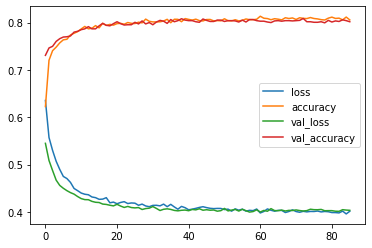

In [147]:
model_loss.plot()

In [148]:
pred_nn = (model.predict(X_test_nn)>0.5).astype('int32')

In [149]:
print('The Accuracy Score for the model is: ',accuracy_score(y_test_nn,pred_nn))
print('')
print(classification_report(y_test_nn,pred_nn))
print('')
print(confusion_matrix(y_test_nn,pred_nn))

The Accuracy Score for the model is:  0.8016147635524798

              precision    recall  f1-score   support

       False       0.80      0.80      0.80       867
        True       0.80      0.80      0.80       867

    accuracy                           0.80      1734
   macro avg       0.80      0.80      0.80      1734
weighted avg       0.80      0.80      0.80      1734


[[693 174]
 [170 697]]


### OVERALL WE CAN CONCLUDE THAT THE BEST MODELS WERE XGB CLASSIFIER, RANDOM FOREST CLASSIFIER AND NEURAL NETWORK CLASSIFIER WHICH ALL OF THEM ROUGHLY ACHIEVED AROUND 80% ACCURACY.